# **Telkom University | Preprocessing & EDA**

## **Data Cleaning & Preprocessing**

### Import libraries

In [1]:
import pandas as pd
import string
import re
import ast
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv('../../dataset/labeled_data/Tel-U_labelled.csv')

print(df.shape)
print(df.info())
df.head()


(988, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   page            988 non-null    int64  
 1   name            988 non-null    object 
 2   link            988 non-null    object 
 3   thumbnail       988 non-null    object 
 4   rating          988 non-null    float64
 5   date            988 non-null    object 
 6   snippet         962 non-null    object 
 7   images          988 non-null    object 
 8   local_guide     988 non-null    bool   
 9   label_sentimen  962 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 70.6+ KB
None


,page,name,link,thumbnail,rating,date,snippet,images,local_guide,label_sentimen
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True,negatif
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True,negatif
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,4 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True,netral
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True,positif
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,[],True,negatif


In [3]:
df['rating'].describe()

count    988.000000
mean       4.411943
std        1.186439
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

### Hapus kolom yang tidak diperlukan

In [4]:
df.columns

Index(['page', 'name', 'link', 'thumbnail', 'rating', 'date', 'snippet',
       'images', 'local_guide', 'label_sentimen'],
      dtype='object')

In [5]:
# drop the columns
df = df.drop(columns=['page', 'name', 'link', 'thumbnail', 'date', 'images', 'local_guide'], axis=1)
df.head(10)

,rating,snippet,label_sentimen
0,4.0,"Kampus swasta di area yg padat, luas sekali t...",negatif
1,1.0,Siang hari ini hadir wisuda anak. Tempat wisud...,negatif
2,5.0,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,netral
3,5.0,"Kampus swasta ternama, lokasi di bojongsoang k...",positif
4,1.0,Yang terhormat bapak kepala satpam dan manajem...,negatif
5,3.0,"Securitynya disana engga ramah ya, terus pada ...",negatif
6,5.0,"2016, Bisa Bikin Brand, Terimakasih Ilmunya Pa...",positif
7,1.0,ATURA SIH ATURAN MASA DRIVER ONLINE OJOL MASU...,negatif
8,1.0,WASTE TIME BANGET DI SURUH JALAN KE ASRAMA PUT...,negatif
9,5.0,Kampus swasta terbaik di Indonesia. Kereeen...,positif


### Convert to lowercase

In [6]:
df['snippet'] = df['snippet'].str.lower()
df.head()

,rating,snippet,label_sentimen
0,4.0,"kampus swasta di area yg padat, luas sekali t...",negatif
1,1.0,siang hari ini hadir wisuda anak. tempat wisud...,negatif
2,5.0,jangan lupa follow ig : mfft_27\ntrmksh 🙏🤩,netral
3,5.0,"kampus swasta ternama, lokasi di bojongsoang k...",positif
4,1.0,yang terhormat bapak kepala satpam dan manajem...,negatif


### Hapus Missing Values

In [7]:
df.shape

(988, 3)

In [8]:
df.isnull().sum()

rating             0
snippet           26
label_sentimen    26
dtype: int64

In [9]:
df = df.dropna()
df.head()

,rating,snippet,label_sentimen
0,4.0,"kampus swasta di area yg padat, luas sekali t...",negatif
1,1.0,siang hari ini hadir wisuda anak. tempat wisud...,negatif
2,5.0,jangan lupa follow ig : mfft_27\ntrmksh 🙏🤩,netral
3,5.0,"kampus swasta ternama, lokasi di bojongsoang k...",positif
4,1.0,yang terhormat bapak kepala satpam dan manajem...,negatif


In [10]:
df.isnull().sum()

rating            0
snippet           0
label_sentimen    0
dtype: int64

In [11]:
df.shape

(962, 3)

### Menghapus Whitespace

In [12]:
def remove_extra_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    text = text.strip()
    # Menghapus spasi berlebih di tengah teks
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_extra_whitespace)

In [13]:
df.head()

,rating,snippet,label_sentimen
0,4.0,"kampus swasta di area yg padat, luas sekali tp...",negatif
1,1.0,siang hari ini hadir wisuda anak. tempat wisud...,negatif
2,5.0,jangan lupa follow ig : mfft_27 trmksh 🙏🤩,netral
3,5.0,"kampus swasta ternama, lokasi di bojongsoang k...",positif
4,1.0,yang terhormat bapak kepala satpam dan manajem...,negatif


### Hapus Punctuation

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

df['snippet'] = df['snippet'].apply(remove_punctuations)

In [16]:
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus swasta di area yg padat luas sekali tp ...,negatif
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif
2,5.0,jangan lupa follow ig mfft27 trmksh 🙏🤩,netral
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif
4,1.0,yang terhormat bapak kepala satpam dan manajem...,negatif


### Visualisasi sebelum preprocessing

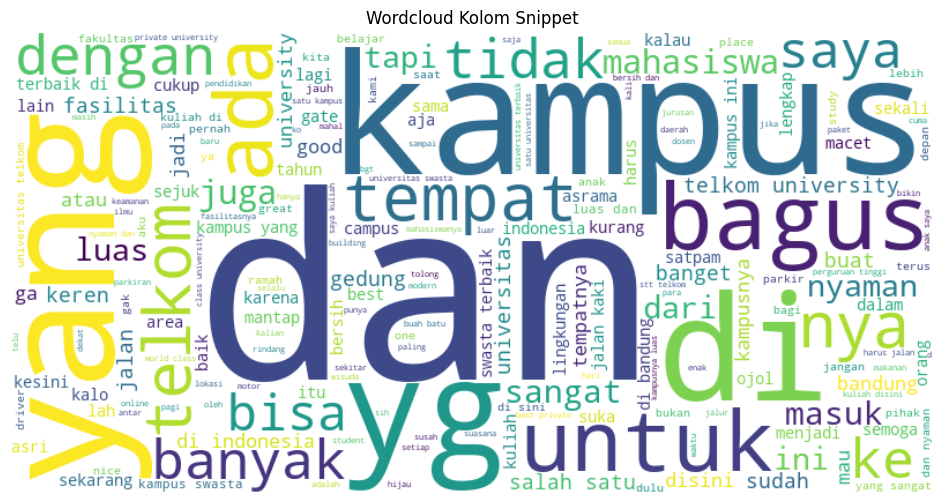

In [17]:
# Gabungkan semua teks dari kolom 'snippet' yang tidak null
text = " ".join(df['snippet'].dropna())

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom Snippet')
plt.show()

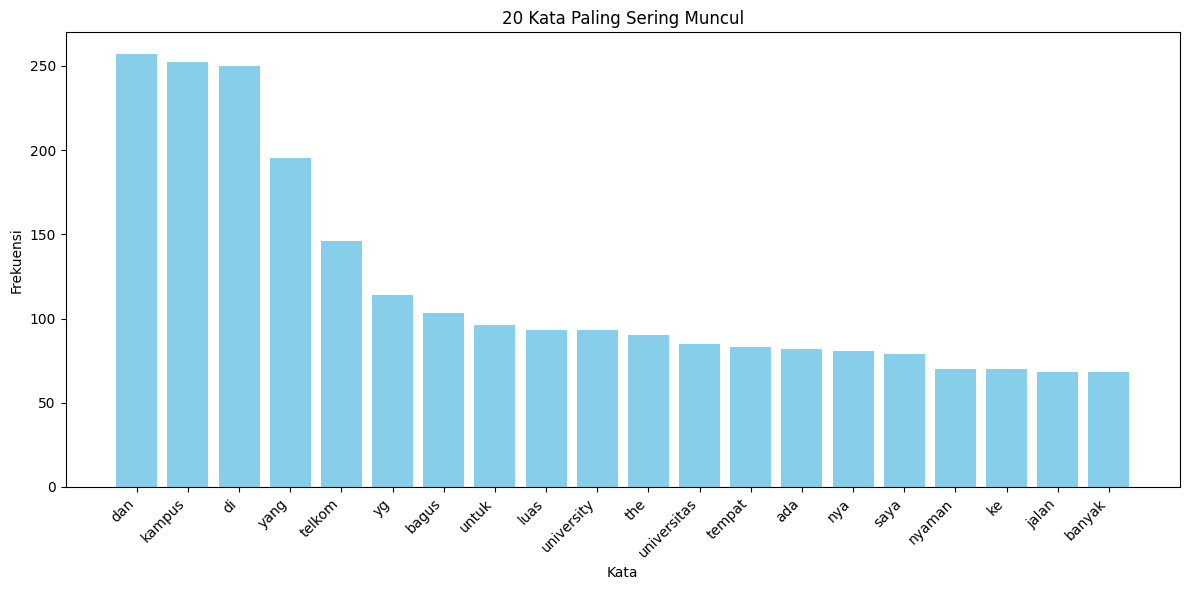

In [18]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Hapus special characters / emot

In [19]:
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus swasta di area yg padat luas sekali tp ...,negatif
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif
2,5.0,jangan lupa follow ig mfft27 trmksh 🙏🤩,netral
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif
4,1.0,yang terhormat bapak kepala satpam dan manajem...,negatif


In [20]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_spl_chars)

In [21]:
df.head(10)

,rating,snippet,label_sentimen
0,4.0,kampus swasta di area yg padat luas sekali tp ...,negatif
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif
2,5.0,jangan lupa follow ig mfft27 trmksh,netral
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif
4,1.0,yang terhormat bapak kepala satpam dan manajem...,negatif
5,3.0,securitynya disana engga ramah ya terus pada s...,negatif
6,5.0,2016 bisa bikin brand terimakasih ilmunya pak bi,positif
7,1.0,atura sih aturan masa driver online ojol masuk...,negatif
8,1.0,waste time banget di suruh jalan ke asrama put...,negatif
9,5.0,kampus swasta terbaik di indonesia kereeen,positif


### Normalisasi

In [22]:
# Load kamus slang
with open('kamus_slang.json', encoding='utf-8') as f:
    slang_dict = ast.literal_eval(f.read())

# Fungsi untuk mengganti kata slang dengan kata yang sudah dinormalisasi
def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

# Menerapkan normalisasi pada kolom snippet
df['snippet'] = df['snippet'].apply(lambda x: normalize_text(x))
df.head(10)
    

,rating,snippet,label_sentimen
0,4.0,kampus swasta di area yang padat luas sekali t...,negatif
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif
2,5.0,jangan lupa follow ig mfft27 trmksh,netral
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif
4,1.0,yang terhormat bapak kepala satuan pengamanan ...,negatif
5,3.0,securitynya disana tidak ramah ya terus pada s...,negatif
6,5.0,2016 bisa bikin brand terimakasih ilmunya pak bi,positif
7,1.0,atura sih aturan masa driver online ojol masuk...,negatif
8,1.0,waste time banget di suruh jalan ke asrama put...,negatif
9,5.0,kampus swasta terbaik di indonesia keren,positif


### Tokenisasi

In [23]:
def tokenize_text(text):
    # Tokenisasi teks
    tokens = text.split()
    # Mengembalikan daftar token
    return tokens

df['tokens'] = df['snippet'].apply(tokenize_text)

df.head(10)

,rating,snippet,label_sentimen,tokens
0,4.0,kampus swasta di area yang padat luas sekali t...,negatif,"[kampus, swasta, di, area, yang, padat, luas, ..."
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif,"[siang, hari, ini, hadir, wisuda, anak, tempat..."
2,5.0,jangan lupa follow ig mfft27 trmksh,netral,"[jangan, lupa, follow, ig, mfft27, trmksh]"
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif,"[kampus, swasta, ternama, lokasi, di, bojongso..."
4,1.0,yang terhormat bapak kepala satuan pengamanan ...,negatif,"[yang, terhormat, bapak, kepala, satuan, penga..."
5,3.0,securitynya disana tidak ramah ya terus pada s...,negatif,"[securitynya, disana, tidak, ramah, ya, terus,..."
6,5.0,2016 bisa bikin brand terimakasih ilmunya pak bi,positif,"[2016, bisa, bikin, brand, terimakasih, ilmuny..."
7,1.0,atura sih aturan masa driver online ojol masuk...,negatif,"[atura, sih, aturan, masa, driver, online, ojo..."
8,1.0,waste time banget di suruh jalan ke asrama put...,negatif,"[waste, time, banget, di, suruh, jalan, ke, as..."
9,5.0,kampus swasta terbaik di indonesia keren,positif,"[kampus, swasta, terbaik, di, indonesia, keren]"


### Stopwords Removal

In [24]:
from nltk.corpus import stopwords
# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(10)


,rating,snippet,label_sentimen,tokens
0,4.0,kampus swasta di area yang padat luas sekali t...,negatif,"[kampus, swasta, area, padat, luas, sayang, pe..."
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif,"[siang, hadir, wisuda, anak, wisuda, worted, d..."
2,5.0,jangan lupa follow ig mfft27 trmksh,netral,"[lupa, follow, ig, mfft27, trmksh]"
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif,"[kampus, swasta, ternama, lokasi, bojongsoang,..."
4,1.0,yang terhormat bapak kepala satuan pengamanan ...,negatif,"[terhormat, kepala, satuan, pengamanan, manaje..."
5,3.0,securitynya disana tidak ramah ya terus pada s...,negatif,"[securitynya, disana, ramah, ya, ngerokok, tug..."
6,5.0,2016 bisa bikin brand terimakasih ilmunya pak bi,positif,"[2016, bikin, brand, terimakasih, ilmunya, bi]"
7,1.0,atura sih aturan masa driver online ojol masuk...,negatif,"[atura, sih, aturan, driver, online, ojol, mas..."
8,1.0,waste time banget di suruh jalan ke asrama put...,negatif,"[waste, time, banget, suruh, jalan, asrama, pu..."
9,5.0,kampus swasta terbaik di indonesia keren,positif,"[kampus, swasta, terbaik, indonesia, keren]"


### Stemming dengan Sastrawi


In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['tokens'] = df['tokens'].apply(stem_text)
df.head(10)

,rating,snippet,label_sentimen,tokens
0,4.0,kampus swasta di area yang padat luas sekali t...,negatif,"[kampus, swasta, area, padat, luas, sayang, ta..."
1,1.0,siang hari ini hadir wisuda anak tempat wisuda...,negatif,"[siang, hadir, wisuda, anak, wisuda, worted, d..."
2,5.0,jangan lupa follow ig mfft27 trmksh,netral,"[lupa, follow, ig, mfft27, trmksh]"
3,5.0,kampus swasta ternama lokasi di bojongsoang ka...,positif,"[kampus, swasta, nama, lokasi, bojongsoang, ka..."
4,1.0,yang terhormat bapak kepala satuan pengamanan ...,negatif,"[hormat, kepala, satu, aman, manajemen, teleko..."
5,3.0,securitynya disana tidak ramah ya terus pada s...,negatif,"[securitynya, sana, ramah, ya, ngerokok, tugas..."
6,5.0,2016 bisa bikin brand terimakasih ilmunya pak bi,positif,"[2016, bikin, brand, terimakasih, ilmu, bi]"
7,1.0,atura sih aturan masa driver online ojol masuk...,negatif,"[atura, sih, atur, driver, online, ojol, masuk..."
8,1.0,waste time banget di suruh jalan ke asrama put...,negatif,"[waste, time, banget, suruh, jalan, asrama, pu..."
9,5.0,kampus swasta terbaik di indonesia keren,positif,"[kampus, swasta, baik, indonesia, keren]"


### Visualisasi setelah preprocessing

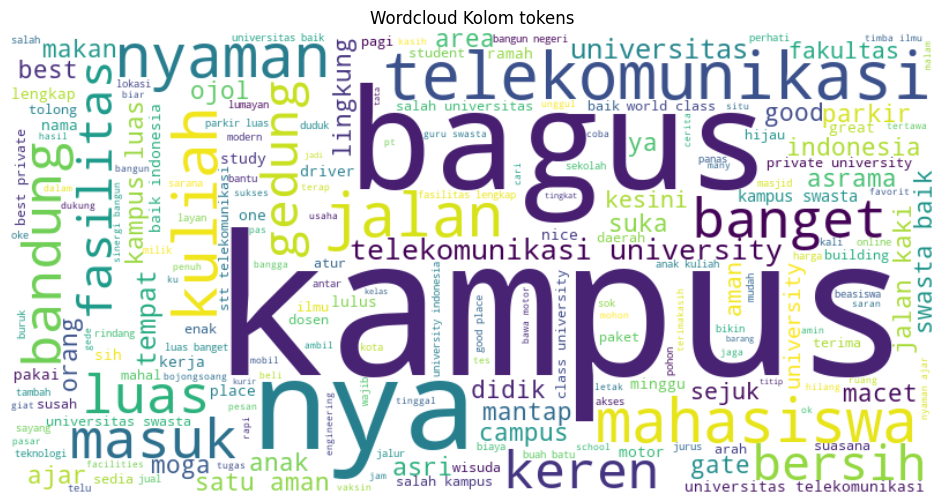

In [27]:
# Gabungkan semua token dari kolom 'tokens' yang tidak null menjadi satu string
all_tokens = [token for tokens in df['tokens'].dropna() for token in tokens]
text = " ".join(all_tokens)

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom tokens')
plt.show()

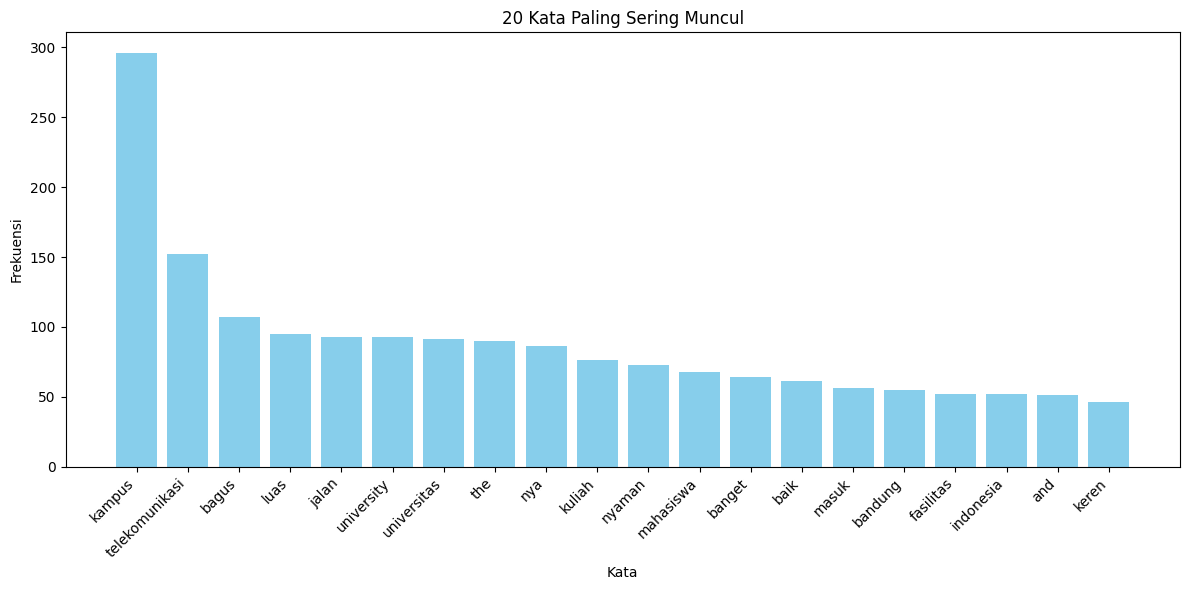

In [28]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Simpan dataset bersih


In [29]:
# Ubah urutan kolom sebelum menyimpan
df = df[['rating', 'snippet', 'tokens', 'label_sentimen']]

output_path = '../../dataset/cleaned_dataset/Tel-U_labelled_cleaned.csv'

try:
	# Save the dataframe to a CSV file
	df.to_csv(output_path, index=False)
	print(f"DataFrame successfully saved to {output_path}")
except Exception as e:
	print(f"An error occurred: {e}")

DataFrame successfully saved to ../../dataset/cleaned_dataset/Tel-U_labelled_cleaned.csv


## **Exploratory Data Analysis (EDA)**

In [30]:
df['rating'].unique()

array([4., 1., 5., 3., 2.])

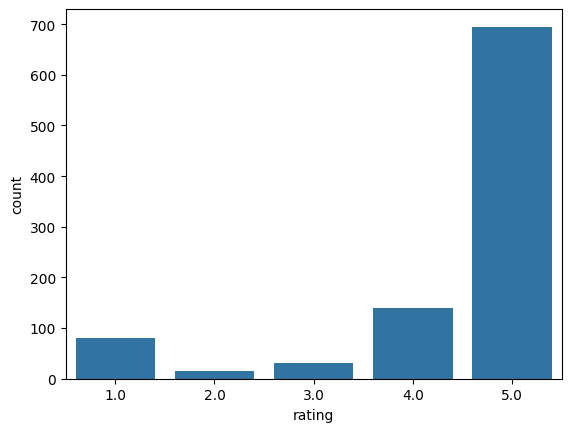

rating
5.0    695
4.0    139
1.0     81
3.0     32
2.0     15
Name: count, dtype: int64


In [31]:
sns.countplot(x=df['rating'])
plt.show()
print(df['rating'].value_counts())

In [32]:
df['label_sentimen'].unique()

array(['negatif', 'netral', 'positif'], dtype=object)

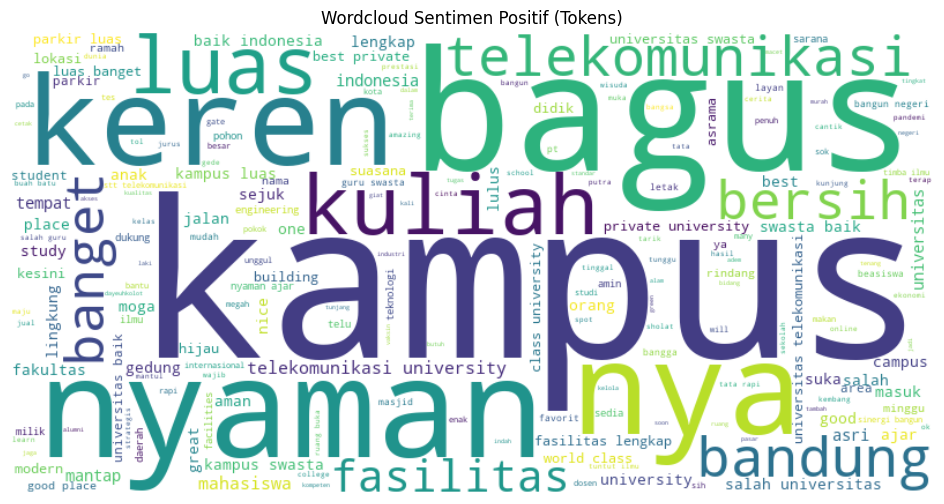

In [33]:
# Visualisasi Wordcloud untuk sentimen positif pada kolom tokens
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens'].dropna()
text_tokens_positif = " ".join([token for tokens in tokens_positif for token in tokens])
wordcloud_tokens_positif = WordCloud(width=800, height=400, background_color='white').generate(text_tokens_positif)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tokens_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif (Tokens)')
plt.show()

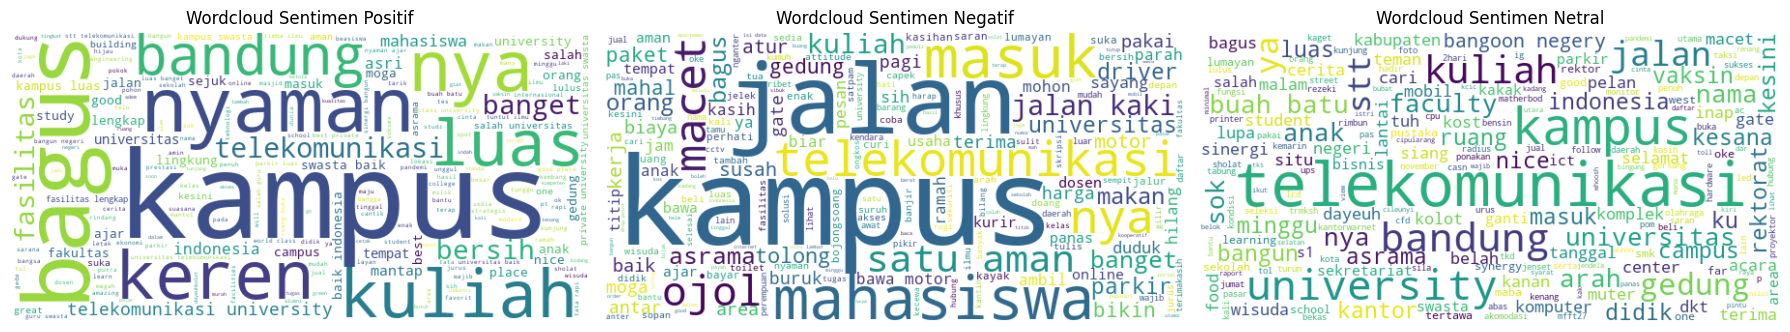

In [34]:
# Visualisasi Wordcloud untuk masing-masing sentimen pada kolom tokens
sentiments = ['positif', 'negatif', 'netral']
plt.figure(figsize=(18, 5))

for i, sentiment in enumerate(sentiments):
    # Gabungkan semua token menjadi satu string untuk sentimen tertentu
    tokens_sentiment = df[df['label_sentimen'] == sentiment]['tokens'].dropna()
    text_sentiment = " ".join([token for tokens in tokens_sentiment for token in tokens])
    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text_sentiment)
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}')

plt.tight_layout()
plt.show()

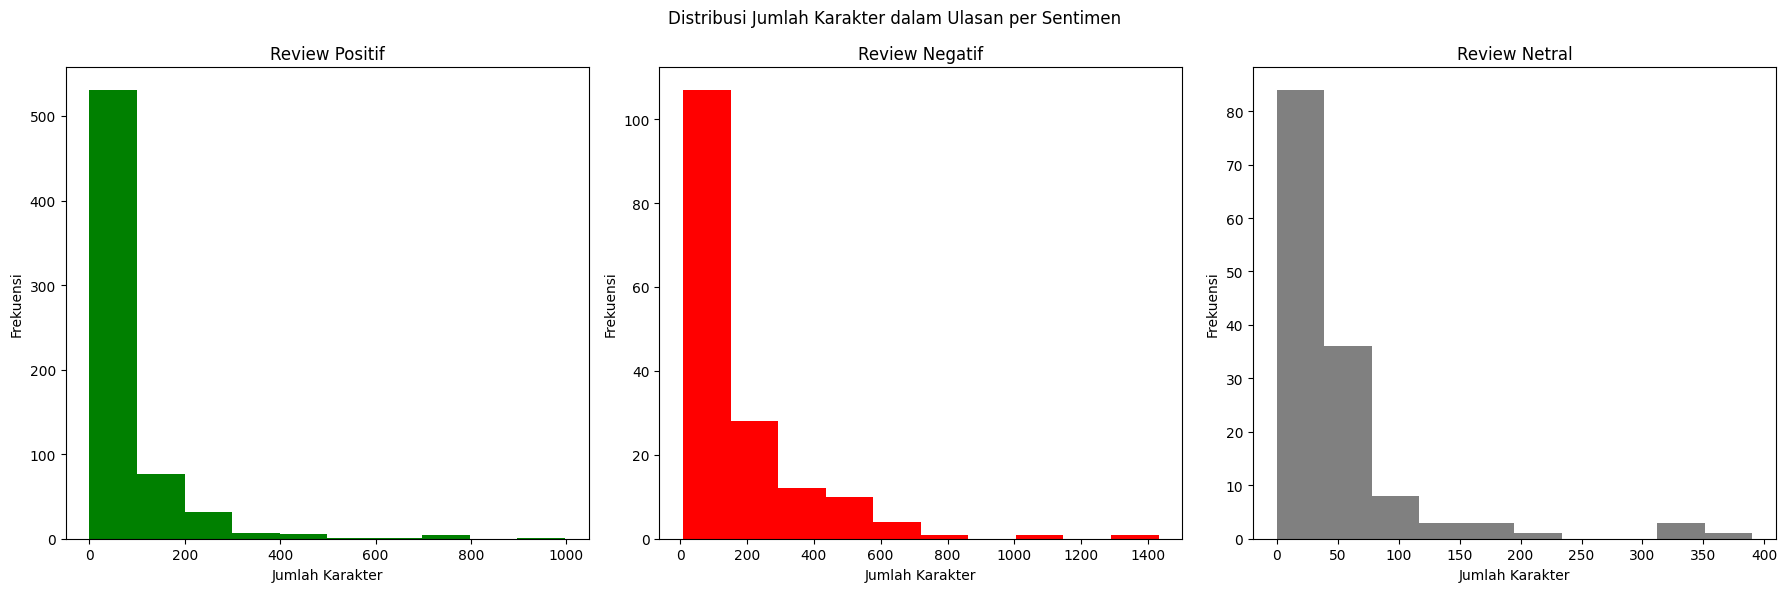

In [35]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    review_lengths = df[df['label_sentimen'] == sentiment]['snippet'].str.len()
    axes[i].hist(review_lengths, color=colors[i])
    axes[i].set_title(f'Review {sentiment.capitalize()}')
    axes[i].set_xlabel('Jumlah Karakter')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Jumlah Karakter dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


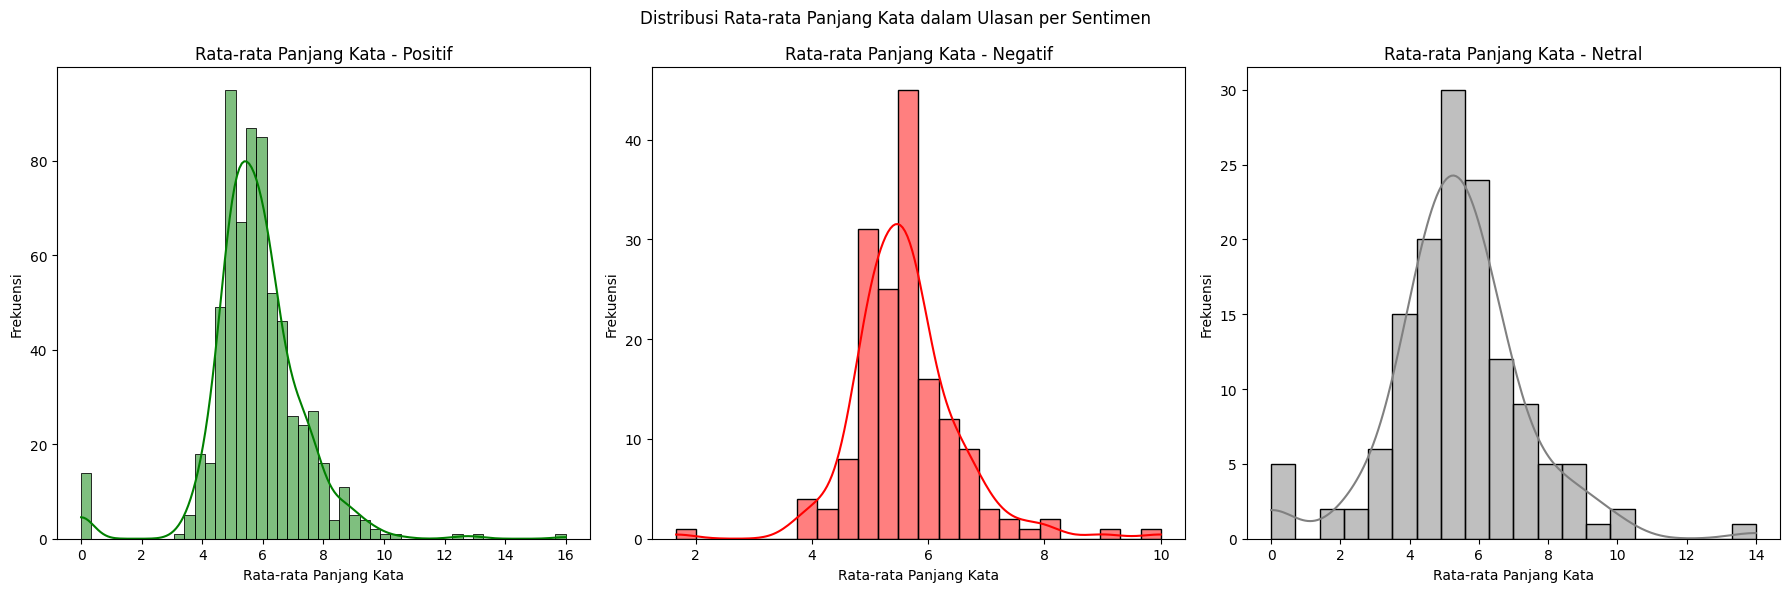

In [36]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    # Ambil token untuk setiap sentimen
    tokens = df[df['label_sentimen'] == sentiment]['tokens']
    # Hitung rata-rata panjang kata per ulasan
    avg_word_length = tokens.apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
    sns.histplot(avg_word_length, ax=axes[i], color=colors[i], kde=True)
    axes[i].set_title(f'Rata-rata Panjang Kata - {sentiment.capitalize()}')
    axes[i].set_xlabel('Rata-rata Panjang Kata')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Rata-rata Panjang Kata dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


In [37]:
from collections import Counter
import plotly.express as px

def get_top_token_ngrams(token_series, n=20, ngram=1):
    ngram_list = []
    for tokens in token_series.dropna():
        ngram_list.extend([' '.join(tokens[i:i+ngram]) for i in range(len(tokens)-ngram+1)])
    return Counter(ngram_list).most_common(n)

# Visualisasi untuk sentimen positif
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens']
most_common_uni_positif = get_top_token_ngrams(tokens_positif, 20, 1)
most_common_uni_positif = dict(most_common_uni_positif)

temp_positif = pd.DataFrame({
    "Common_words": list(most_common_uni_positif.keys()),
    "Count": list(most_common_uni_positif.values())
})

fig_positif = px.bar(
    temp_positif, x="Count", y="Common_words",
    title="Common Words in Positif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_positif.show()

# Visualisasi untuk sentimen negatif
tokens_negatif = df[df['label_sentimen'] == 'negatif']['tokens']
most_common_uni_negatif = get_top_token_ngrams(tokens_negatif, 20, 1)
most_common_uni_negatif = dict(most_common_uni_negatif)

temp_negatif = pd.DataFrame({
    "Common_words": list(most_common_uni_negatif.keys()),
    "Count": list(most_common_uni_negatif.values())
})

fig_negatif = px.bar(
    temp_negatif, x="Count", y="Common_words",
    title="Common Words in Negatif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_negatif.show()

# Visualisasi untuk sentimen netral
tokens_netral = df[df['label_sentimen'] == 'netral']['tokens']
most_common_uni_netral = get_top_token_ngrams(tokens_netral, 20, 1)
most_common_uni_netral = dict(most_common_uni_netral)

temp_netral = pd.DataFrame({
    "Common_words": list(most_common_uni_netral.keys()),
    "Count": list(most_common_uni_netral.values())
})

fig_netral = px.bar(
    temp_netral, x="Count", y="Common_words",
    title="Common Words in Netral Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_netral.show()


# **⚠️ Warning:**  
Disitribusi kelas tidak seimbang (imbalance data) pada kelas positif, negatif, dan netral sehingga perlu dilakukan balancing data. (bisa pake teknik oversampling, undersampling, atau SMOTE)

In [38]:
df['label_sentimen'].value_counts()

label_sentimen
positif    659
negatif    164
netral     139
Name: count, dtype: int64